# Notebook to analyze MongoDB Serverless vs. MongoDB performance

In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

current_directory = Path.cwd()

In [2]:
df_results_serverless_eu_north_1 = pd.read_json( current_directory / "results" / "results_serverless_eu_north_1.json", orient="records")
df_results_serverfull_eu_north_1 = pd.read_json( current_directory / "results" / "results_serverfull_eu_north_1.json", orient="records")
df_results_serverless_eu_west_1 = pd.read_json( current_directory / "results" / "results_serverless_eu_west_1.json", orient="records")

In [3]:
df_results_serverless_eu_north_1["type"] = "serverless-eu-north-1"
df_results_serverfull_eu_north_1["type"] = "serverfull-eu-north-1"
df_results_serverless_eu_west_1["type"] = "serverless-eu-west-1"

In [4]:
df_results = pd.concat([
    df_results_serverless_eu_north_1,
    df_results_serverfull_eu_north_1,
    df_results_serverless_eu_west_1
])
# df_results

In [5]:
column_0 = "0. Create a test database and collection"
df_results = df_results.drop(column_0, axis=1)
# df_results

In [6]:
rename = {
    "1. Insert N items with random values": "Insert",
    "2. CreateIndexes": "CreateIndexes",
    "3. FindAndModify": "FindAndModify",
    "4. Aggregate": "Aggregate",
    "5. Find": "Find",
    "6. Distinct": "Distinct",
    "7. Update": "Update",
    "8. Delete": "Delete",
    "9. DbStats": "DbStats",
    "10. Delete collection and db": "Drop"
}
df_results = df_results.rename(columns=rename)
# df_results

In [7]:
df_results = df_results.melt(id_vars="type")
# df_results

In [8]:
df_results = df_results.rename(columns={"value": "duration (s)"})

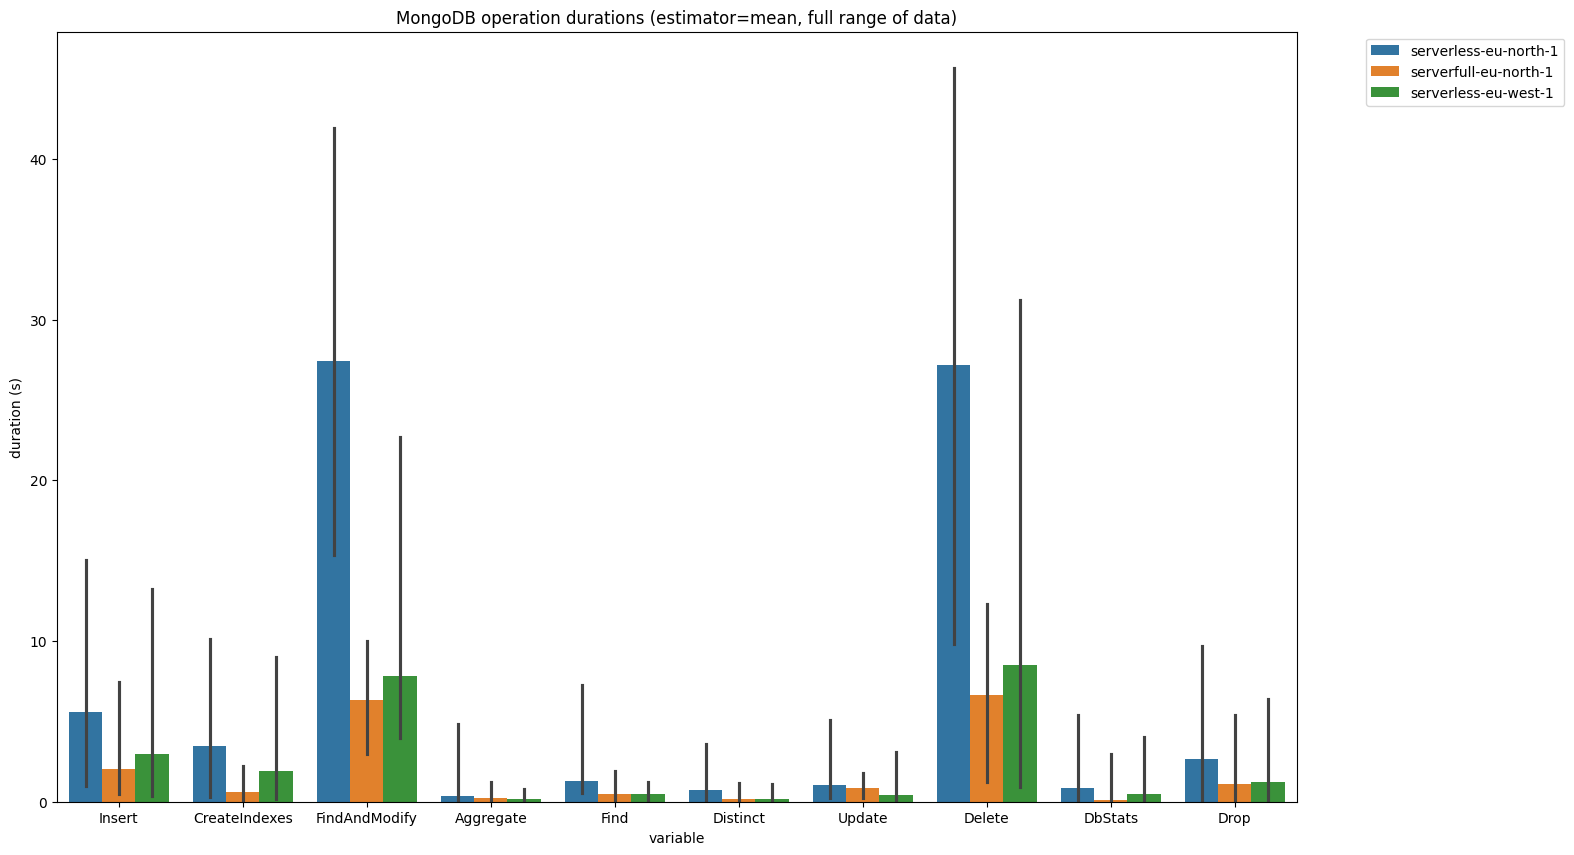

In [9]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(df_results, x="variable", y="duration (s)", estimator="mean", errorbar=("pi", 100), hue="type")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("MongoDB operation durations (estimator=mean, full range of data)")
plt.show()

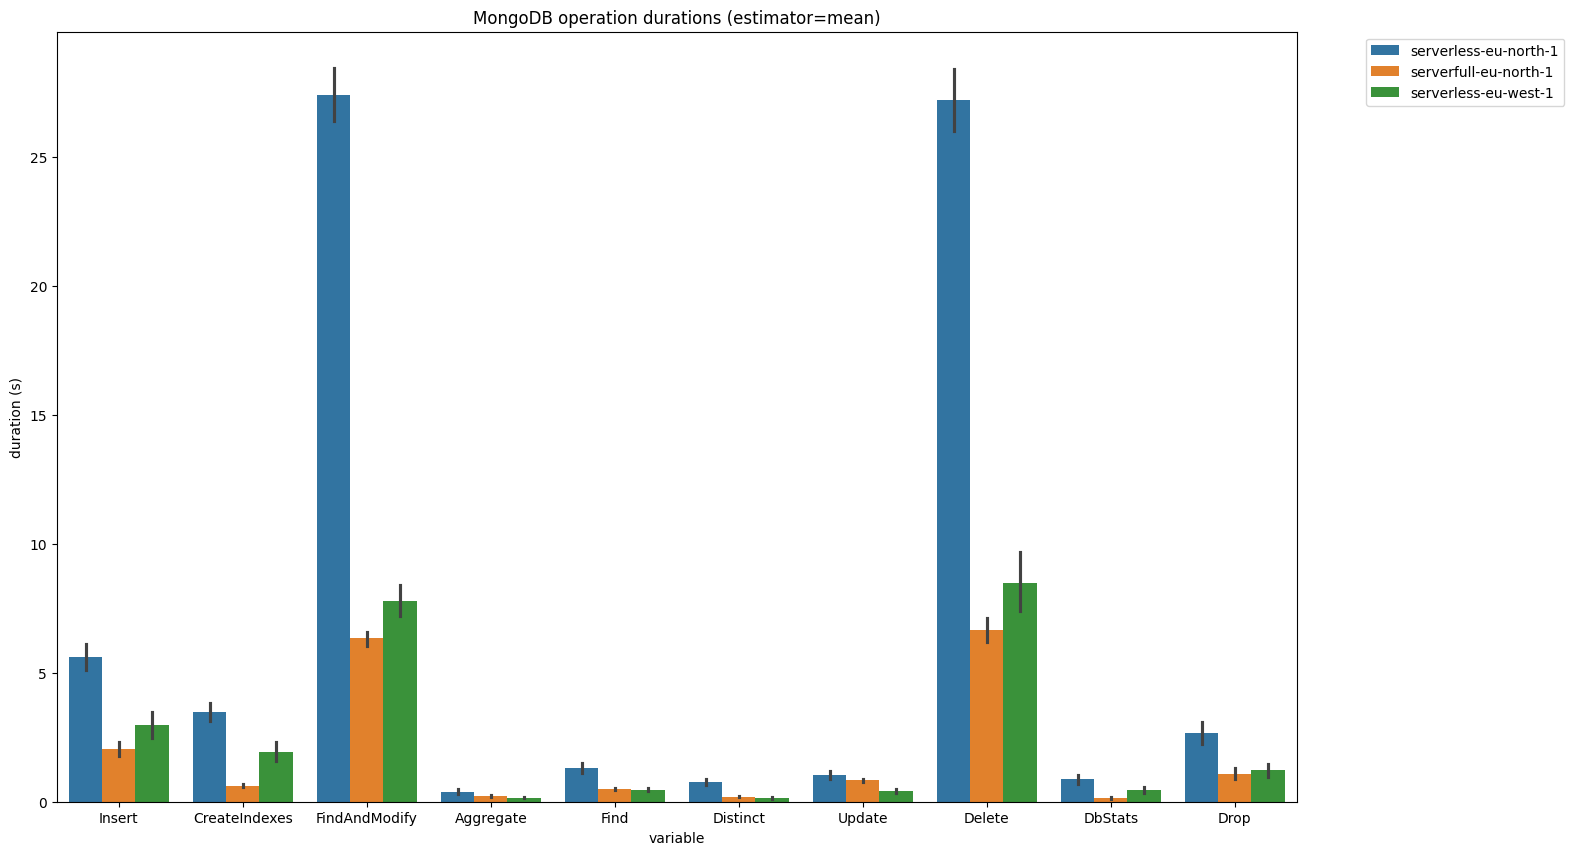

In [10]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(df_results, x="variable", y="duration (s)", estimator="mean", hue="type")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("MongoDB operation durations (estimator=mean)")
plt.show()

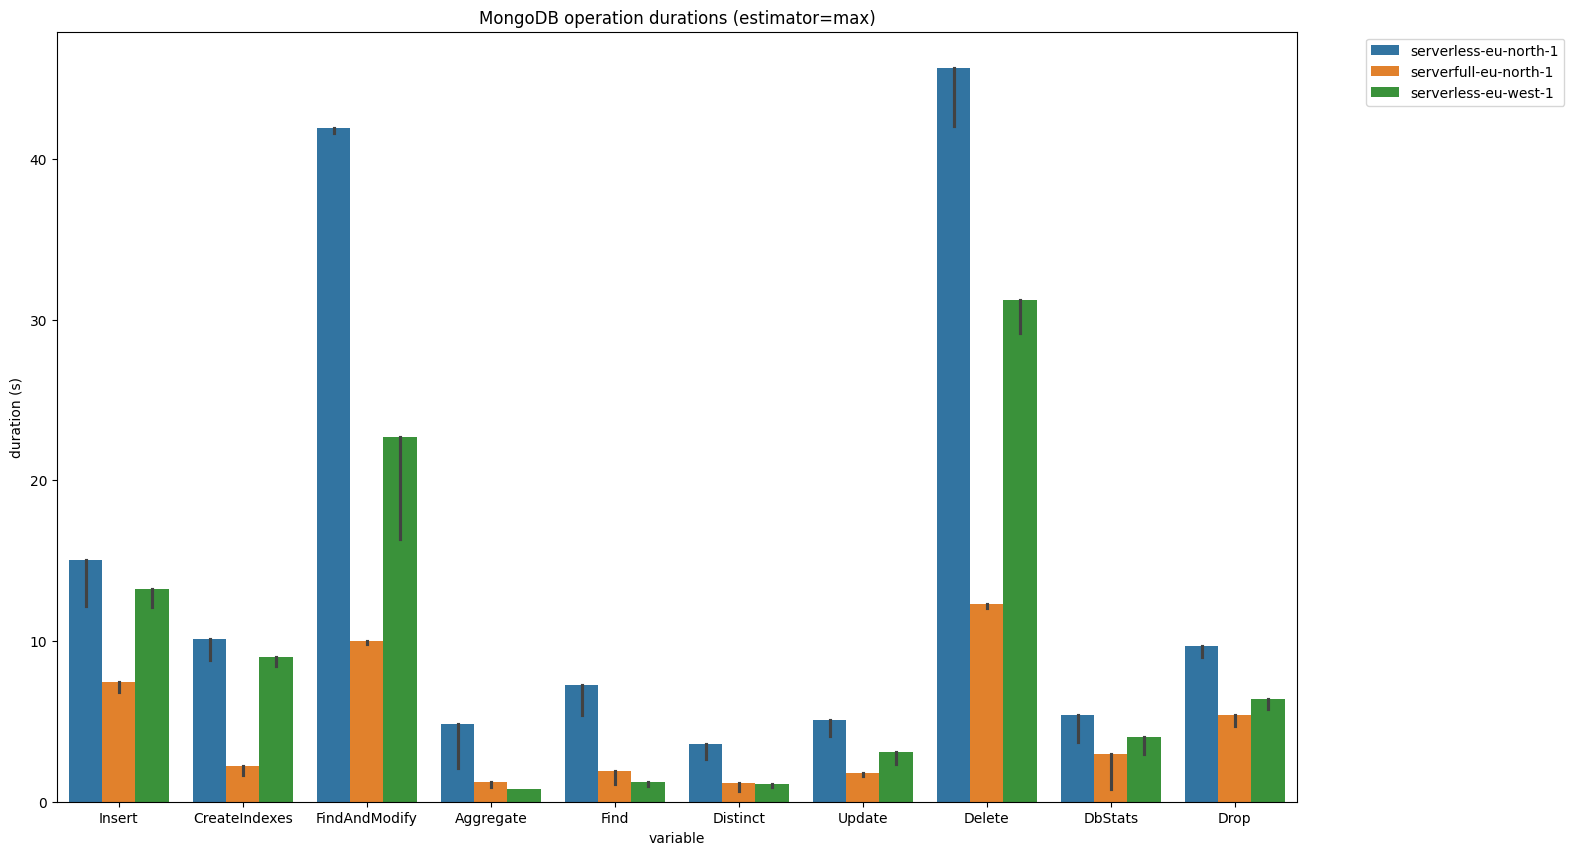

In [11]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(df_results, x="variable", y="duration (s)", estimator="max", hue="type")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("MongoDB operation durations (estimator=max)")
plt.show()

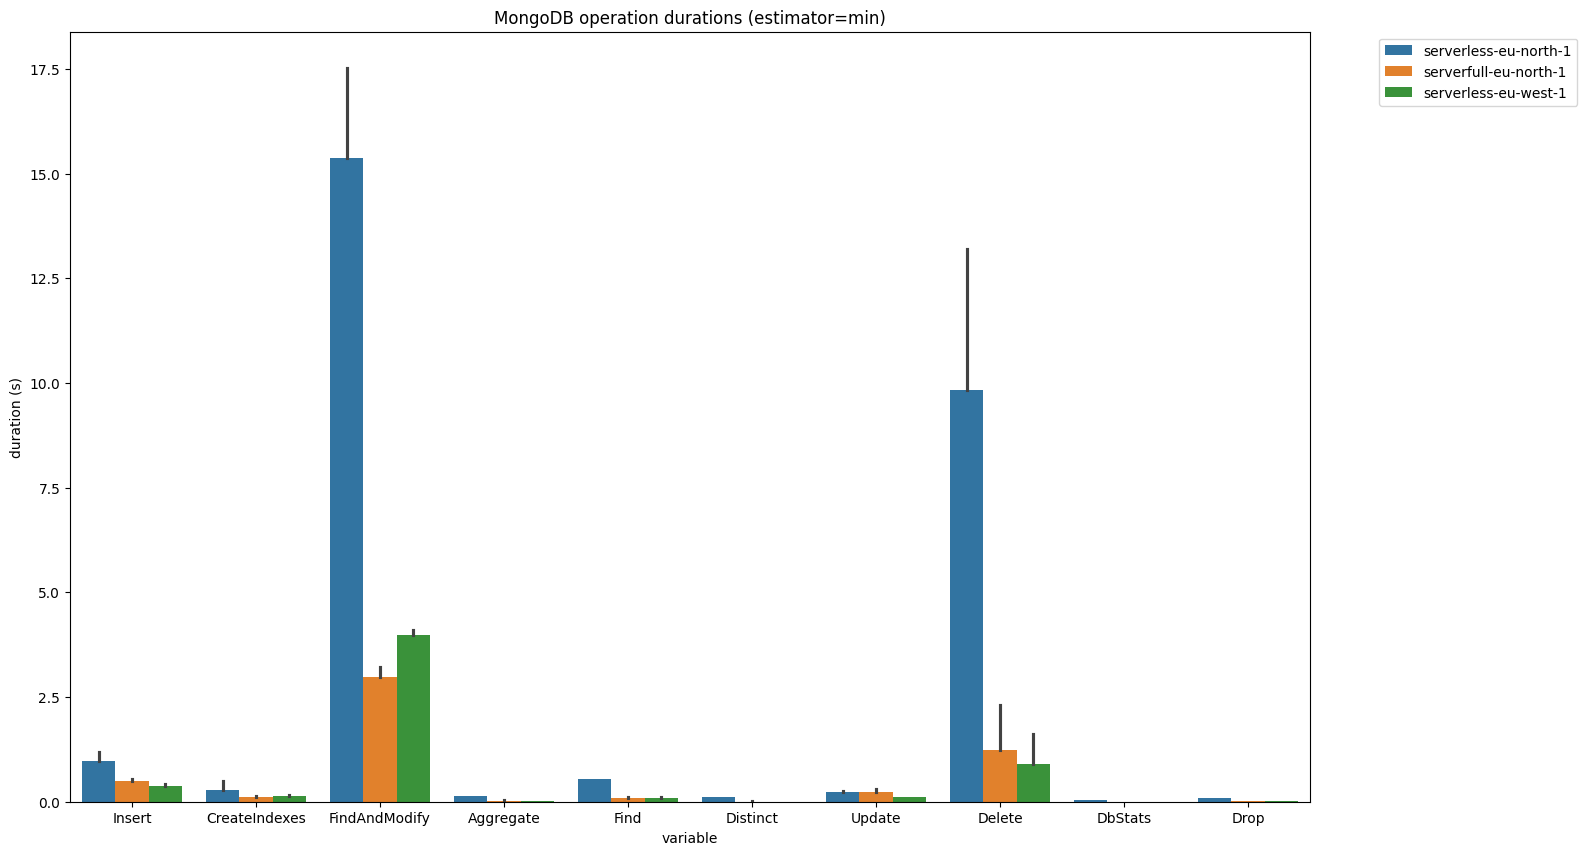

In [12]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(df_results, x="variable", y="duration (s)", estimator="min", hue="type")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("MongoDB operation durations (estimator=min)")
plt.show()